In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('08-Linear-Regression-Models/Advertising.csv')

In [37]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


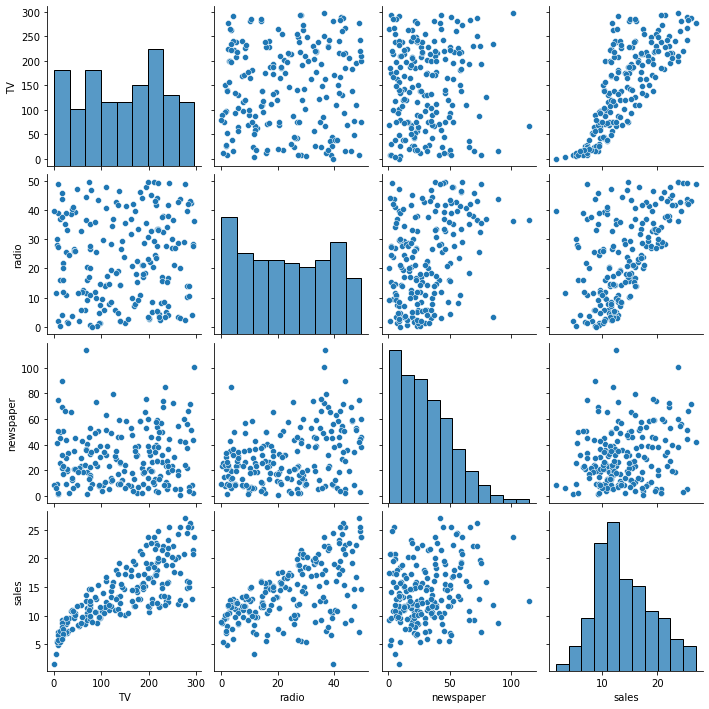

In [38]:
sns.pairplot(data=df)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Perceptron

In [40]:
X = df.drop('sales',axis=1)

In [41]:
y = df['sales']

In [42]:
# help(train_test_split)

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=101)

In [44]:
model = LinearRegression()

In [45]:
model.fit(X_train,y_train)

LinearRegression()

In [46]:
test_pred = model.predict(X_test)

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [48]:
y_test.mean()

13.730303030303025

In [49]:
mean_absolute_error(y_test,test_pred)

1.236918849425931

In [50]:
mean_squared_error(y_test,test_pred)

2.348375242713826

In [51]:
test_residuals = y_test - test_pred

In [53]:
# test_residuals

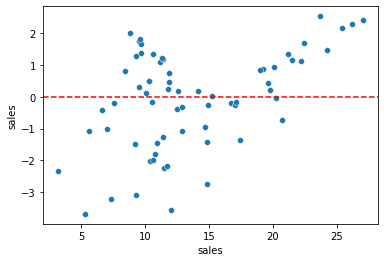

In [55]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red',ls='dashed')

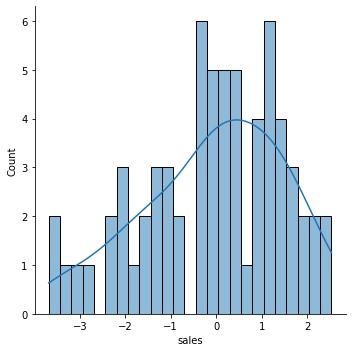

In [57]:
sns.displot(test_residuals,bins=25,kde=True)

In [58]:
import scipy as sp

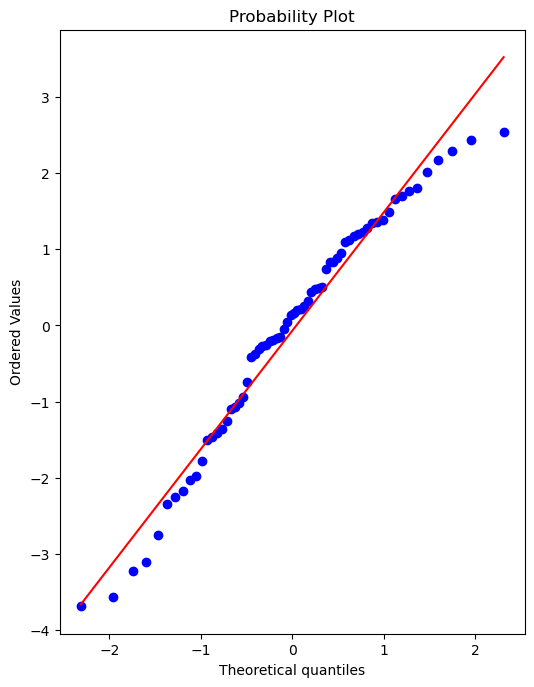

In [60]:
fig,ax = plt.subplots(figsize=(6,8),dpi=100)
_ = sp.stats.probplot(test_residuals,plot=ax)

In [61]:
final_model = LinearRegression()

In [62]:
final_model.fit(X,y)

LinearRegression()

In [63]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [64]:
pd.DataFrame(final_model.coef_,X.columns,columns=['Coef'])

,Coef
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [65]:
y_hat = final_model.predict(X)

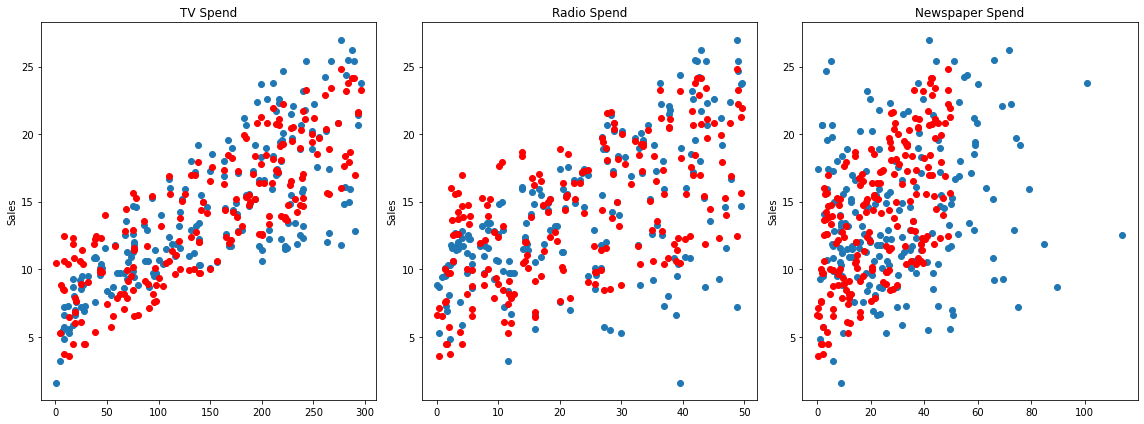

In [66]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [67]:
from joblib import dump,load

In [68]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [69]:
load_model = load('final_sales_model.joblib')

In [70]:
load_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [71]:
campaign = [[149,22,12]]

In [72]:
load_model.predict(campaign)

array([13.893032])